<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [110]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# Libraries for data preparation and model building
import optuna
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import shap
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [5]:
df = pd.read_csv("../Time Series Project/df_train.csv")
df_test = pd.read_csv("../Time Series Project/df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract(r'(\d+)').astype(float)
df['Seville_pressure'] = df['Seville_pressure'].str.extract(r'(\d+)').astype(float)
print(df.info()) #checking the data type of each column in the data
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   float64
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [8]:
df.head(10).T 

0                    1  \
Unnamed: 0                              0                    1   
time                  2015-01-01 03:00:00  2015-01-01 06:00:00   
Madrid_wind_speed                0.666667             0.333333   
Valencia_wind_deg                     5.0                 10.0   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed              0.666667             1.666667   
Seville_humidity                74.333333            78.333333   
Madrid_humidity                      64.0            64.666667   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                223.333333                221.0   
Barcelona_wind_speed             6.333333                  4.0   
Barcelona_wind_deg              42.666667                139.0   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed               3.333333             3.333333   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     25.0                 25.0   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                        0.0                  0.0   
Barcelona_pressure            1036.333333          1037.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                      0.0                  0.0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0                800.0   
Bilbao_pressure                    1035.0          1035.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure             1002.666667          1004.333333   
Seville_temp_max               274.254667              274.945   
Madrid_pressure                971.333333           972.666667   
Valencia_temp_max                 269.888           271.728333   
Valencia_temp                     269.888           271.728333   
Bilbao_weather_id                   800.0                800.0   
Seville_temp                   274.254667              274.945   
Valencia_humidity               75.666667                 71.0   
Valencia_temp_min                 269.888           271.728333   
Barcelona_temp_max                281.013           280.561667   
Madrid_temp_max                   265.938           266.386667   
Barcelona_temp                    281.013           280.561667   
Bilbao_temp_min                269.338615              270.376   
Bilbao_temp                    269.338615              270.376   
Barcelona_temp_min                281.013           280.561667   
Bilbao_temp_max                269.338615              270.376   
Seville_temp_min               274.254667              274.945   
Madrid_temp                       265.938           266.386667   
Madrid_temp_min                   265.938           266.386667   
load_shortfall_3h             6715.666667          4171.666667   

                                        2                    3  \
Unnamed: 0                              2                    3   
time                  2015-01-01 09:00:00  2015-01-01 12:00:00   
Madrid_wind_speed                     1.0                  1.0   
Valencia_wind_deg                     9.0                  8.0   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed                   1.0                  1.0   
Seville_humidity                71.333333            65.333333   
Madrid_humidity                 64.333333            56.333333   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_cloud

In [9]:
df.shape

(8763, 49)

In [10]:
df['time'] = pd.to_datetime(df['time'])  # Konwersja na format datetime
df.set_index('time', inplace=True)  # Ustawienie indeksu czasowego

In [11]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.186661
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.220040
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10

<Axes: ylabel='Barcelona_pressure'>

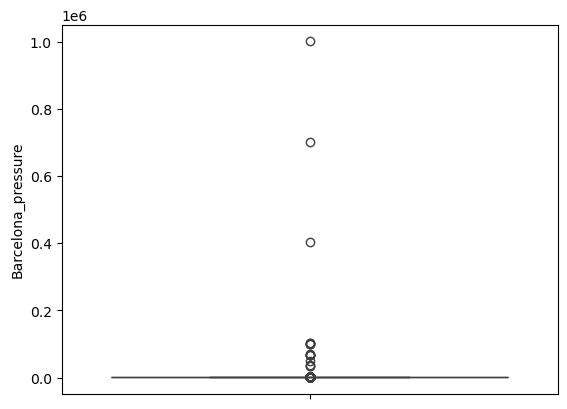

In [12]:
sns.boxplot(df['Barcelona_pressure'])

<Axes: xlabel='Valencia_wind_speed'>

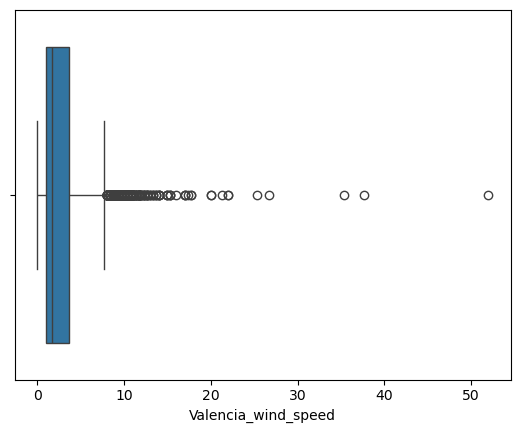

In [13]:
sns.boxplot(x='Valencia_wind_speed', data=df)

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

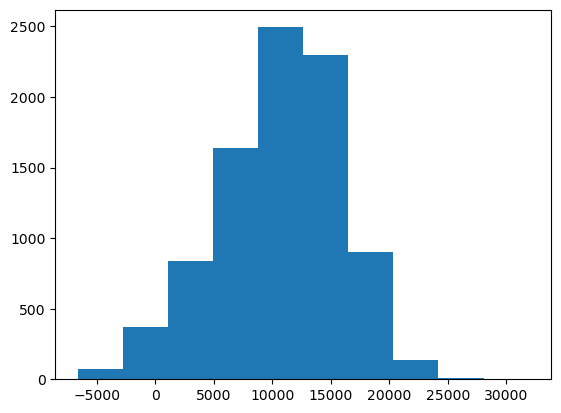

In [14]:
plt.hist(df['load_shortfall_3h'])

In [15]:
print(df.index.to_series().diff().value_counts())  # Sprawdzanie odstępów czasowych

time
0 days 03:00:00    8760
0 days 09:00:00       2
Name: count, dtype: int64


In [16]:
df_resampled = df.resample('3H').asfreq()  # Tworzenie pełnego zakresu czasowego
df_interpolated = df_resampled.interpolate(method='linear')

C:\Users\Ester\AppData\Local\Temp\ipykernel_10136\3160060319.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('3H').asfreq()  # Tworzenie pełnego zakresu czasowego


In [17]:
# Resampling do dziennych średnich
df_daily = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('D').mean())
df_monthly = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('M').mean())

C:\Users\Ester\AppData\Local\Temp\ipykernel_10136\3768631530.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('M').mean())


In [19]:
# plot relevant feature interactions

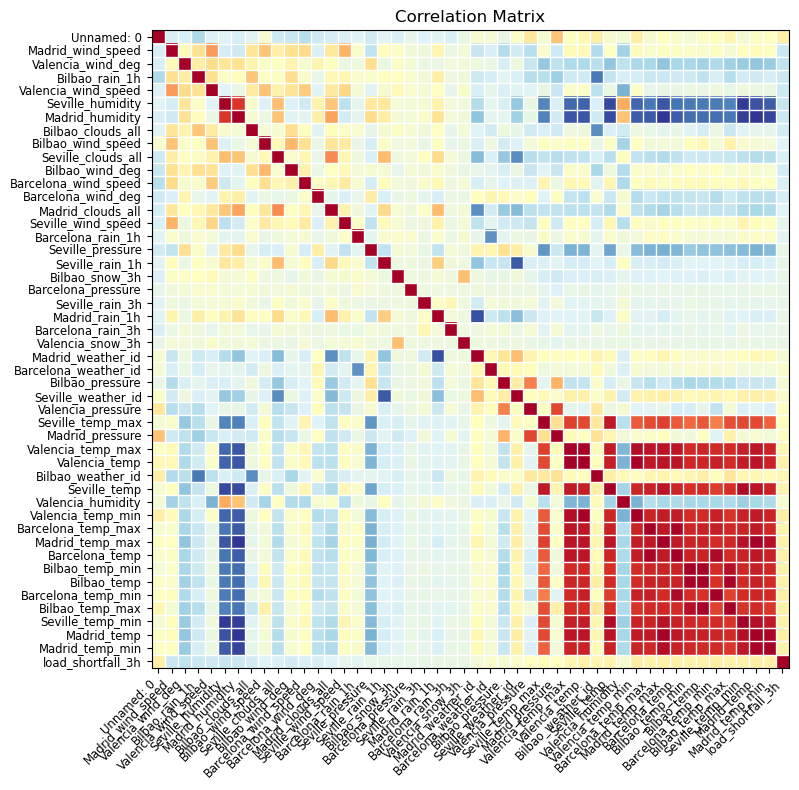

In [20]:
# Visualizing the correlation
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(df_interpolated.corr(), xnames = df_interpolated.corr().columns, ax = ax, );

### Analiza sezonowości

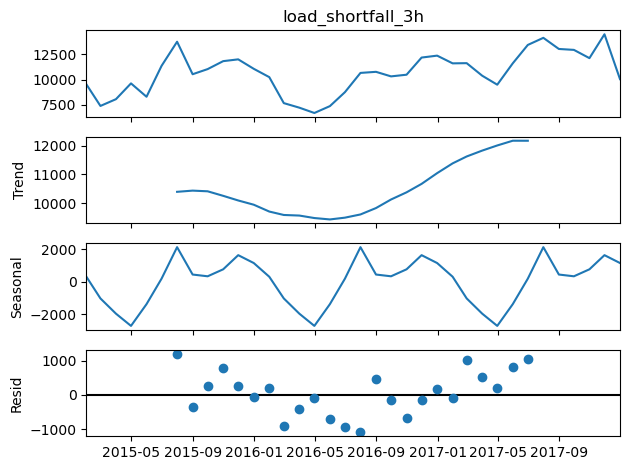

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_monthly['load_shortfall_3h'], model='additive', period=12)

# Wyniki dekompozycji
result.plot()
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [24]:
# remove missing values/ features

In [25]:
# create new features
df_interpolated['Hour_of_day'] = df_interpolated.index.hour
df_interpolated['Day_of_week'] = df_interpolated.index.dayofweek
df_interpolated['Day_of_month'] = df_interpolated.index.day
df_interpolated['Month_of_year'] = df_interpolated.index.month
df_interpolated['Year'] = df_interpolated.index.year
df_interpolated['Day_of_year'] = df_interpolated.index.dayofyear
df_interpolated['Week_of_year'] = df_interpolated.index.isocalendar().week

<Axes: >

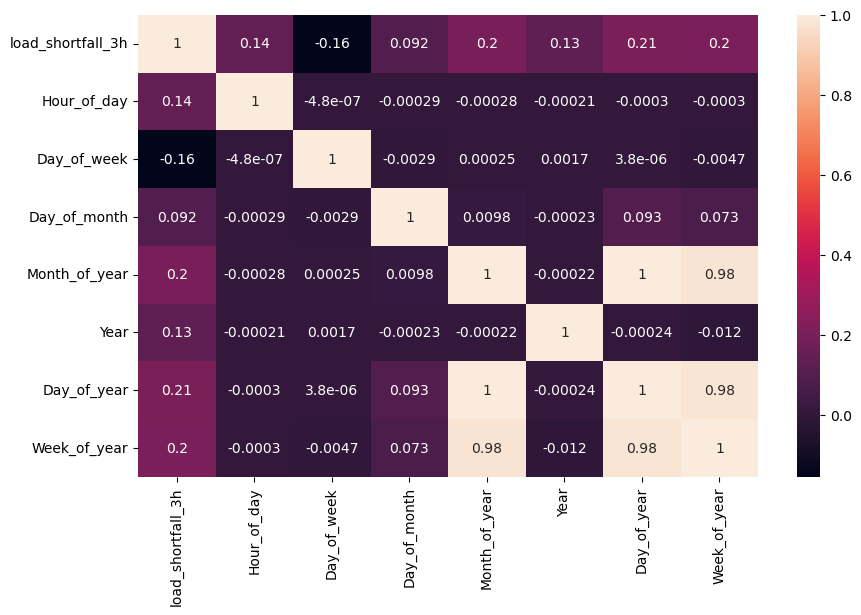

In [26]:
Time_df = df_interpolated.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

In [27]:
df_interpolated = df_interpolated.drop(columns=['Week_of_year','Day_of_year'])

In [28]:
# engineer existing features

<Axes: >

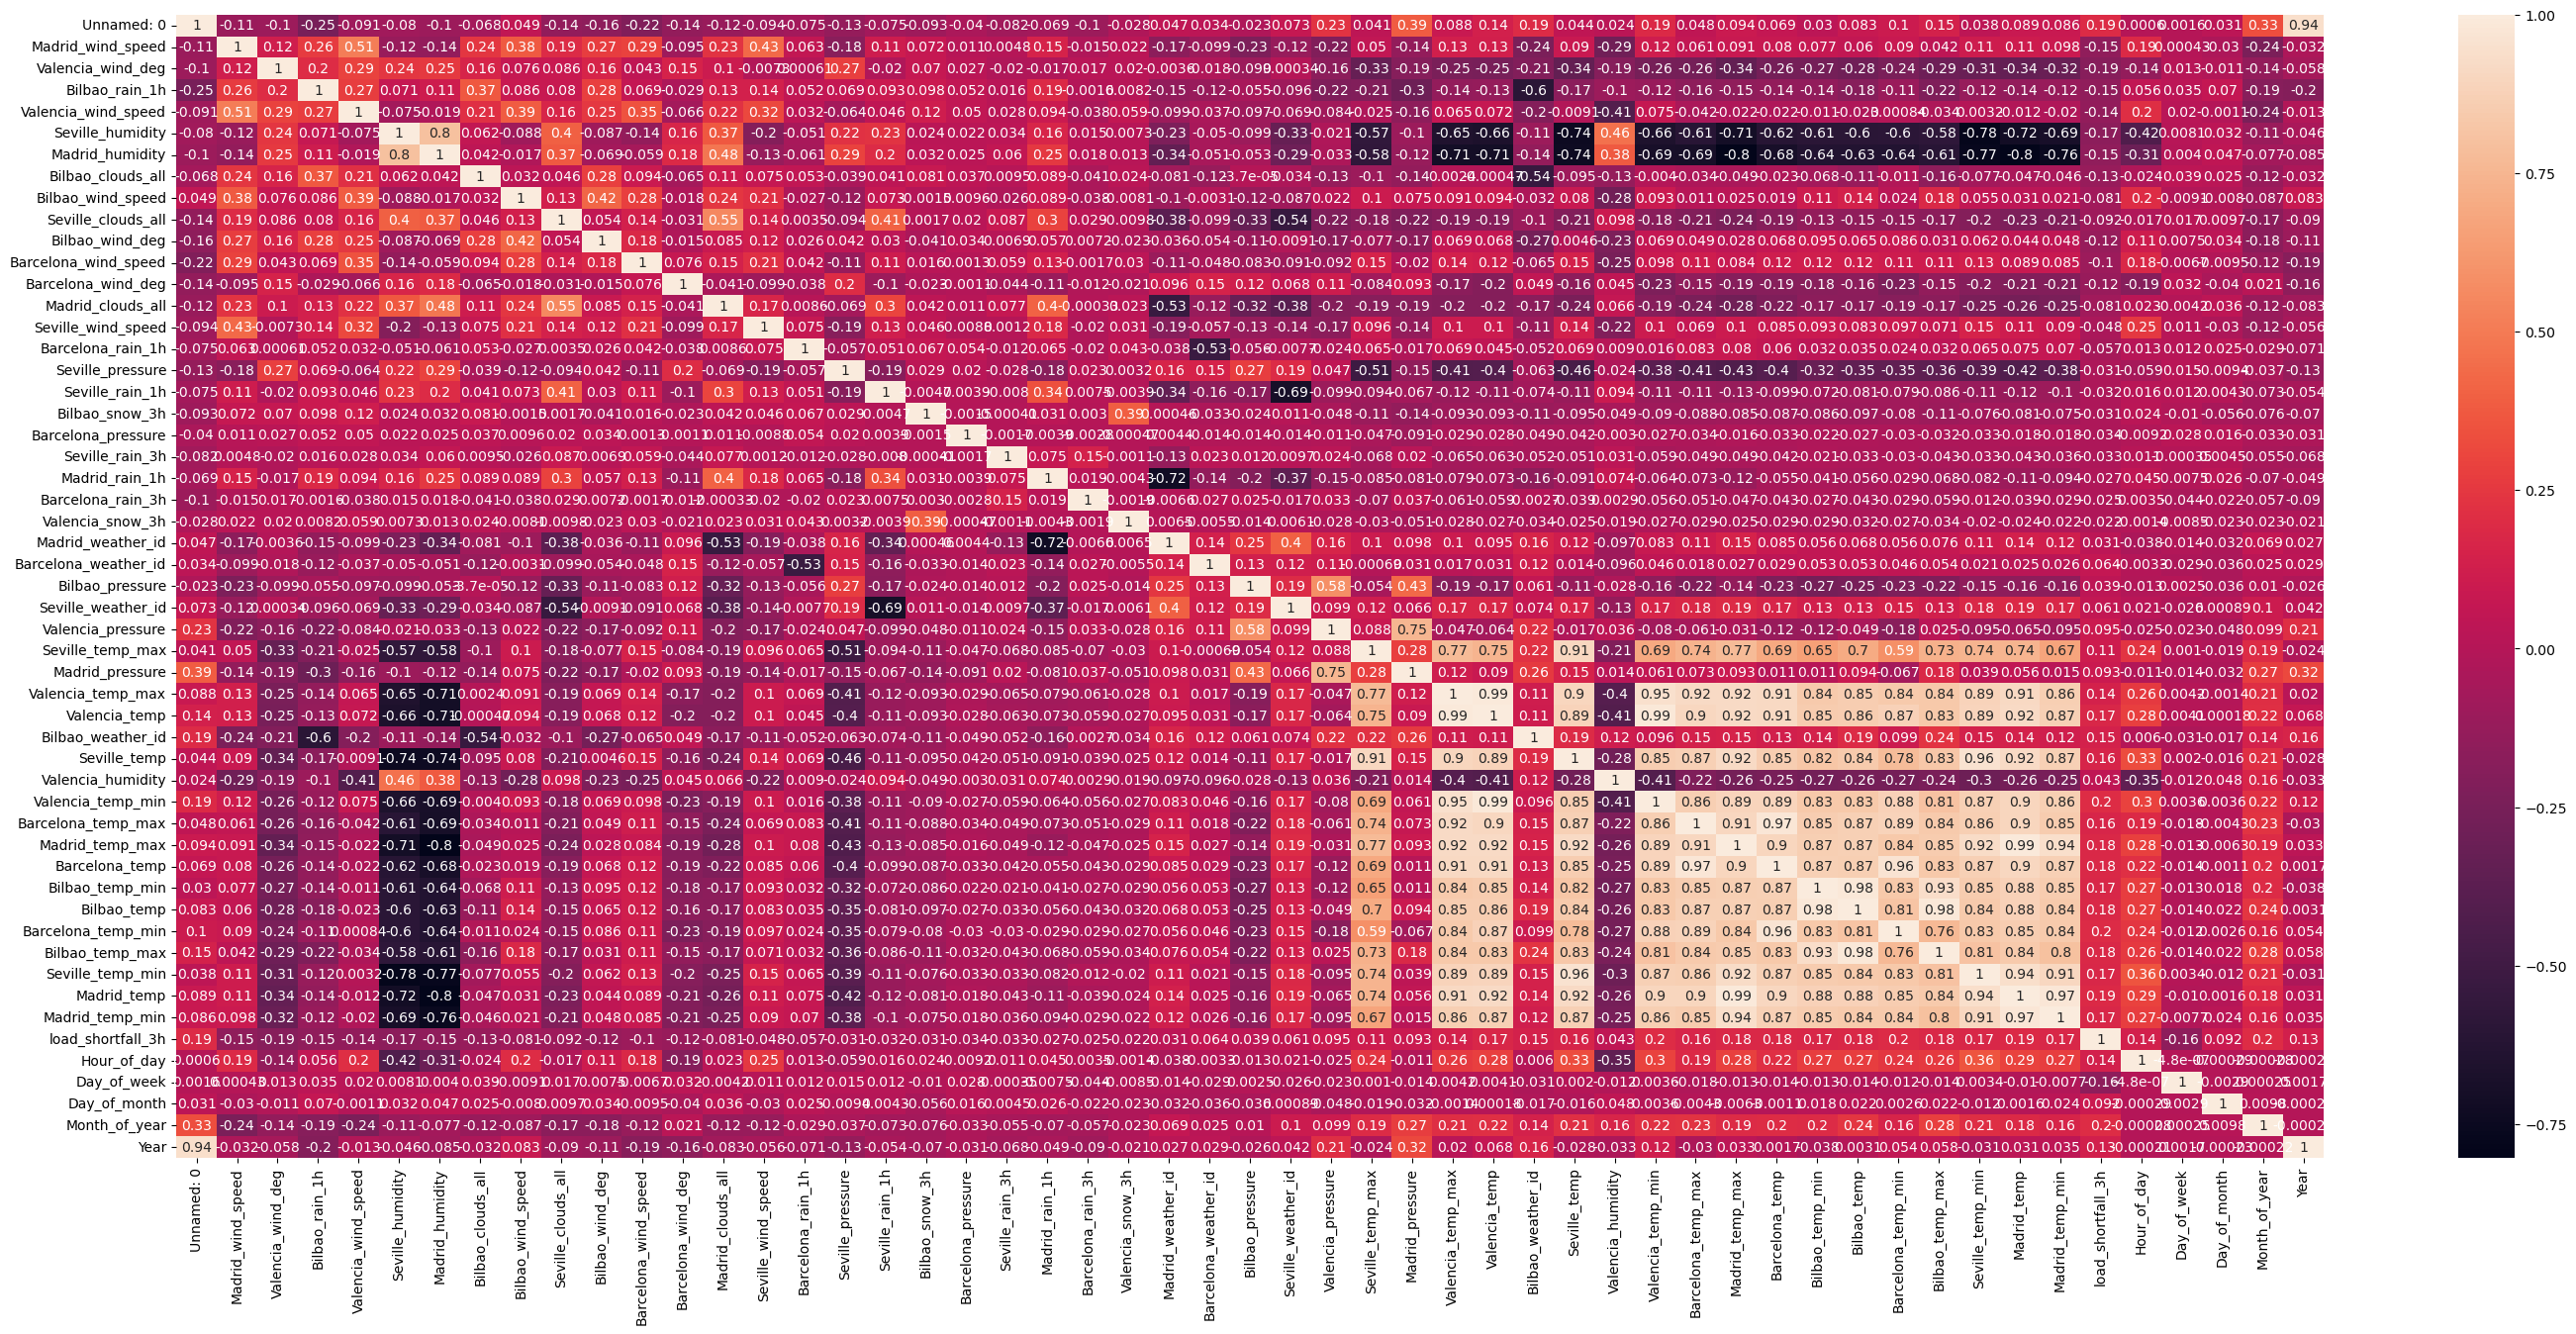

In [176]:
plt.figure(figsize=[35,15])
sns.heatmap(df_interpolated.corr(),annot=True )

In [30]:
X = df_interpolated.drop(columns = 'load_shortfall_3h')
y = df_interpolated['load_shortfall_3h'].astype('int')

In [31]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(30) #To get the least important feature based on ther score 

Features         Score
18        Bilbao_snow_3h  67830.848986
5       Seville_humidity  57018.108354
24     Madrid_weather_id  54462.426813
27    Seville_weather_id  47035.303282
35     Valencia_humidity  39796.752346
49          Day_of_month  34473.178415
47           Hour_of_day  31683.556274
16      Seville_pressure  26902.607262
15     Barcelona_rain_1h  21724.535515
4    Valencia_wind_speed  16028.386623
50         Month_of_year  12952.233426
2      Valencia_wind_deg  11043.601665
8      Bilbao_wind_speed  10930.511941
1      Madrid_wind_speed  10177.741582
48           Day_of_week   9277.297759
14    Seville_wind_speed   8133.285291
11  Barcelona_wind_speed   8017.488366
3         Bilbao_rain_1h   7579.677914
17       Seville_rain_1h   5397.046984
21        Madrid_rain_1h   4228.592972
30       Madrid_pressure   3443.288758
23      Valencia_snow_3h   3111.804109
38       Madrid_temp_max   2283.758333
45           Madrid_temp   2108.189336
46       Madrid_temp_min   2056.188931
29      Seville_temp_max   1849.798733
44      Seville_temp_min   1590.806659
34          Seville_temp   1484.595028
31     Valencia_temp_max   1367.235705
37    Barcelona_temp_max   1261.412164

In [32]:
columns_to_drop = [
    "Madrid_pressure", "Madrid_temp_max", "Madrid_temp", "Madrid_temp_min", 
    "Seville_temp_max", "Seville_temp_min", "Seville_temp", "Valencia_temp_max", 
    "Barcelona_temp_max", "Barcelona_pressure", "Valencia_wind_speed", "Valencia_temp_min", "Valencia_temp", "Bilbao_temp_min",
    "Bilbao_temp", "Barcelona_temp_max", "Bilbao_temp_max", "Barcelona_temp_min", "Seville_humidity", "Unnamed: 0"
]

In [33]:
X = X.drop(columns=columns_to_drop, axis = 1)


<Axes: >

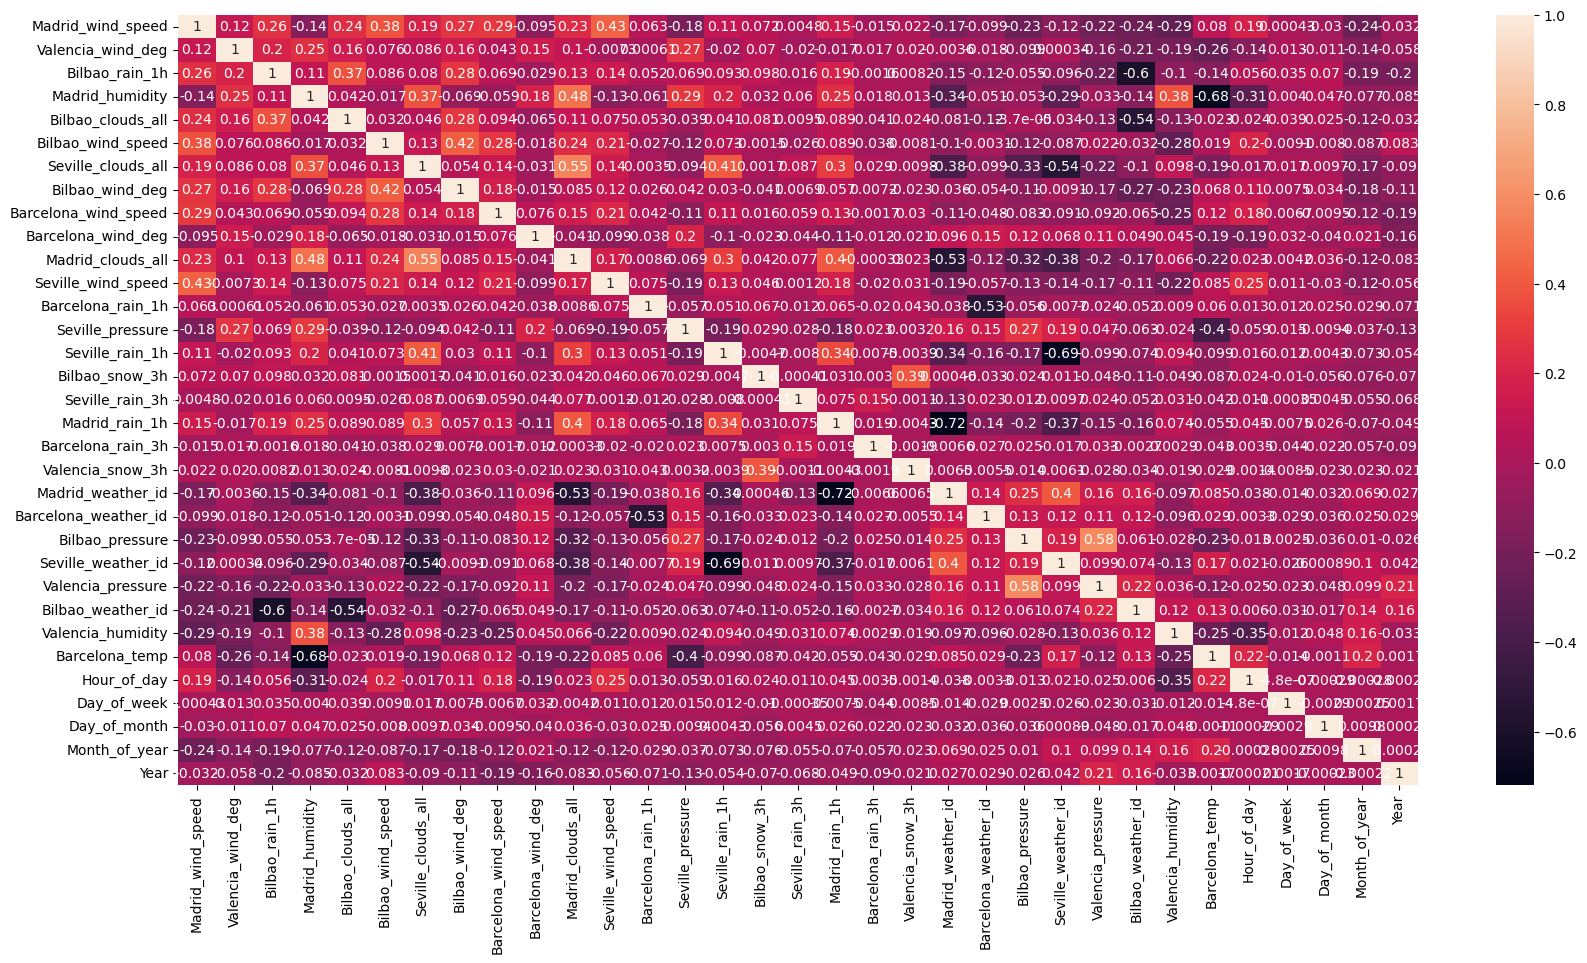

In [34]:
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(),annot=True )

In [35]:
scaler = StandardScaler()
time_index = X.index
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.index = time_index

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [37]:
X_train = X_scaled.loc[X_scaled.index < '2017-05-26 00:00:00']
X_test = X_scaled.loc[X_scaled.index >= '2017-05-26 00:00:00']
y_train = y.loc[y.index < '2017-05-26 00:00:00']
y_test = y.loc[y.index >= '2017-05-26 00:00:00']

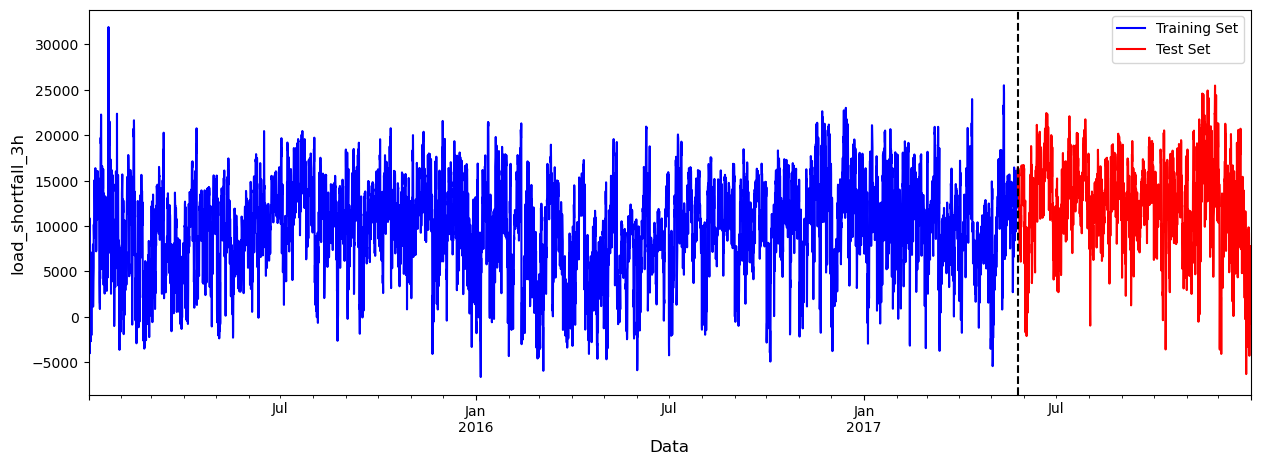

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', color='blue')
y_test.plot(ax=ax, label='Test Set', color='red')
ax.axvline(x='2017-05-26 00:00:00', color='black', ls='--')
ax.legend()
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("load_shortfall_3h", fontsize=12)
plt.show()

In [39]:
#Train one or more ML models

XGBoost

In [112]:
XGB_reg = xgb.XGBRegressor(
    max_depth=4,
    learning_rate=0.012124628117447038,
    n_estimators=700,
    subsample=0.9860393119095388,
    colsample_bytree=0.921092663790075,
    reg_alpha=0.0694305802962762,
    reg_lambda=0.00023029142669961857
)
XGB_reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = True)
XGB_predict = reg.predict(X_test)

[0]	validation_0-rmse:5135.05908	validation_1-rmse:5577.00377
[1]	validation_0-rmse:5115.17135	validation_1-rmse:5559.39665
[2]	validation_0-rmse:5093.37778	validation_1-rmse:5540.11859
[3]	validation_0-rmse:5079.46661	validation_1-rmse:5523.84599
[4]	validation_0-rmse:5060.61415	validation_1-rmse:5508.28348
[5]	validation_0-rmse:5039.56035	validation_1-rmse:5489.84624
[6]	validation_0-rmse:5021.60553	validation_1-rmse:5477.90183
[7]	validation_0-rmse:5001.27257	validation_1-rmse:5459.99989
[8]	validation_0-rmse:4983.68137	validation_1-rmse:5445.47777
[9]	validation_0-rmse:4964.06782	validation_1-rmse:5428.26147
[10]	validation_0-rmse:4944.93637	validation_1-rmse:5413.93828
[11]	validation_0-rmse:4925.99389	validation_1-rmse:5397.23165
[12]	validation_0-rmse:4911.75250	validation_1-rmse:5382.38044
[13]	validation_0-rmse:4894.63960	validation_1-rmse:5369.00429
[14]	validation_0-rmse:4878.19123	validation_1-rmse:5355.24996
[15]	validation_0-rmse:4861.38188	validation_1-rmse:5341.27767
[1

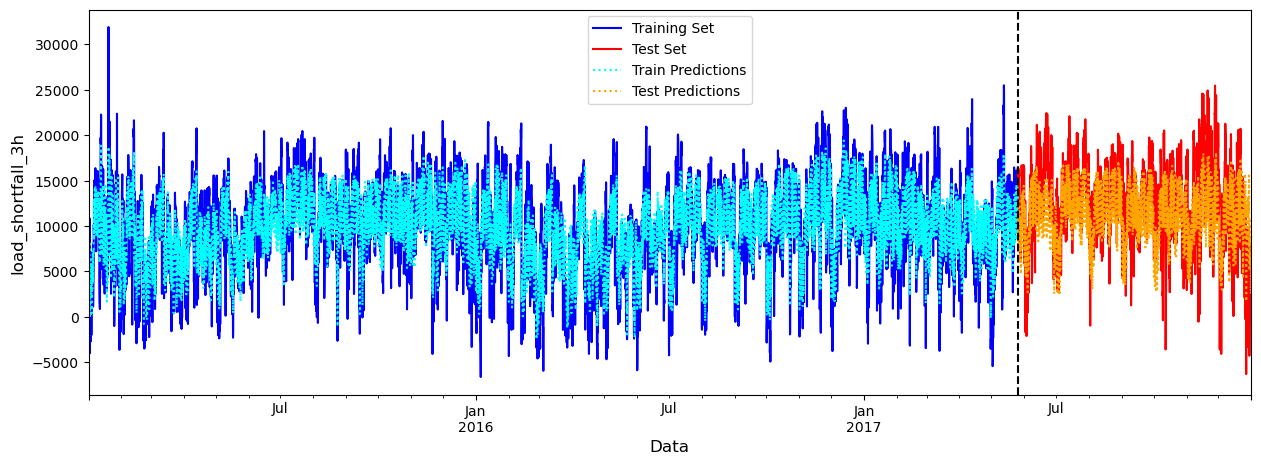

In [42]:
y_train_pred = pd.Series(reg.predict(X_train), index=y_train.index)  
y_test_pred = pd.Series(reg.predict(X_test), index=y_test.index)  
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', color='blue')
y_test.plot(ax=ax, label='Test Set', color='red')
y_train_pred.plot(ax=ax, label='Train Predictions', color='cyan', linestyle="dotted")
y_test_pred.plot(ax=ax, label='Test Predictions', color='orange', linestyle="dotted")
ax.axvline(x=pd.to_datetime('2017-05-26 00:00:00'), color='black', ls='--')
ax.legend()
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("load_shortfall_3h", fontsize=12)
plt.show()

LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
Linear_predict = lm.predict(X_test)

Lasso Regression (L1 Norm)

In [46]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
Lasso_pred = lasso.predict(X_test)

Ridge Regression (L2 Norm)

In [48]:
Ridge = Ridge()
Ridge.fit(X_train, y_train)
Ridge_pred = Ridge.predict(X_test)

Support Vector Regressor

In [50]:
Sv_reg = SVR(kernel='rbf', gamma='auto')
Sv_reg.fit(X_train,y_train)
SV_pred = Sv_reg.predict(X_test)

Decision Tree Model

In [52]:
Reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

Random Forest

In [54]:
RF = RandomForestRegressor(n_estimators= 500, max_depth= 19, min_samples_split= 13, min_samples_leaf= 2)
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

In [55]:
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': Linear_predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': Lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})
XGB_ = pd.DataFrame({'Actual': y_test, 'Predicted': XGB_predict})

In [56]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,Linear_predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,Lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict)),
                        "XGBoost" : np.sqrt(metrics.mean_squared_error(y_test,XGB_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Linear model   4863.531034
Ridge          4863.563964
Lasso          4863.542861
SVR            5336.402179
Decision Tree  5816.920183
Random Forest  4089.705243
XGBoost        3727.697678

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [58]:
# Compare model performance

In [59]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

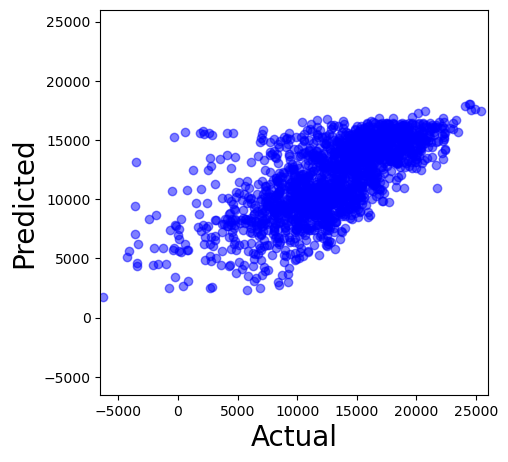

In [136]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, XGB_predict, alpha=0.5, color='blue') 
plt.xlim(-6500, 26000)
plt.ylim(-6500, 26000)
plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)
plt.show()

In [166]:
explainer = shap.Explainer(XGB_reg)
shap_values = explainer(X_train)
shap.initjs()

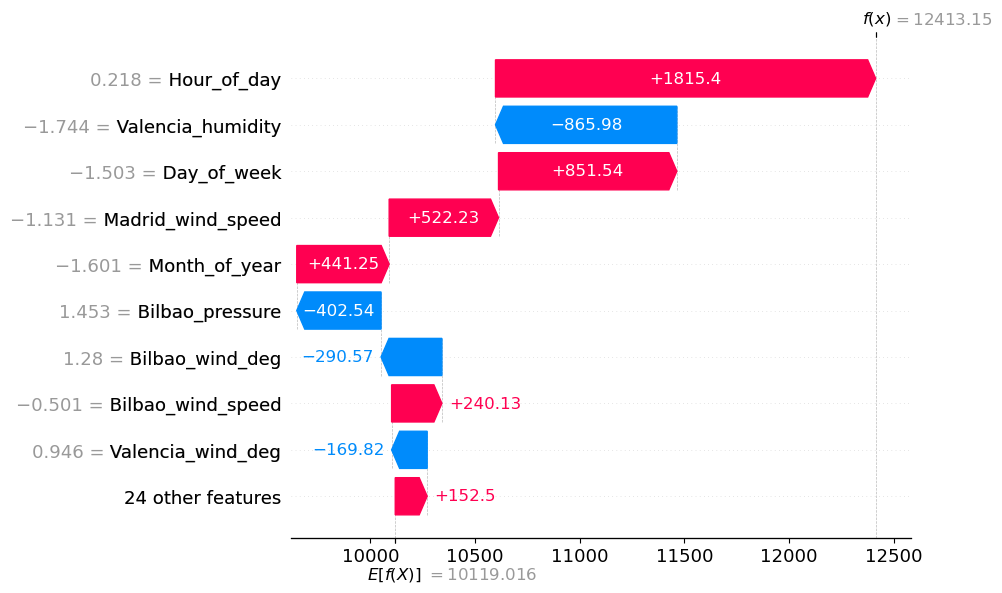

In [156]:
#Wyjaśnienie dla 180 obserwacji
shap.plots.waterfall(shap_values[203])

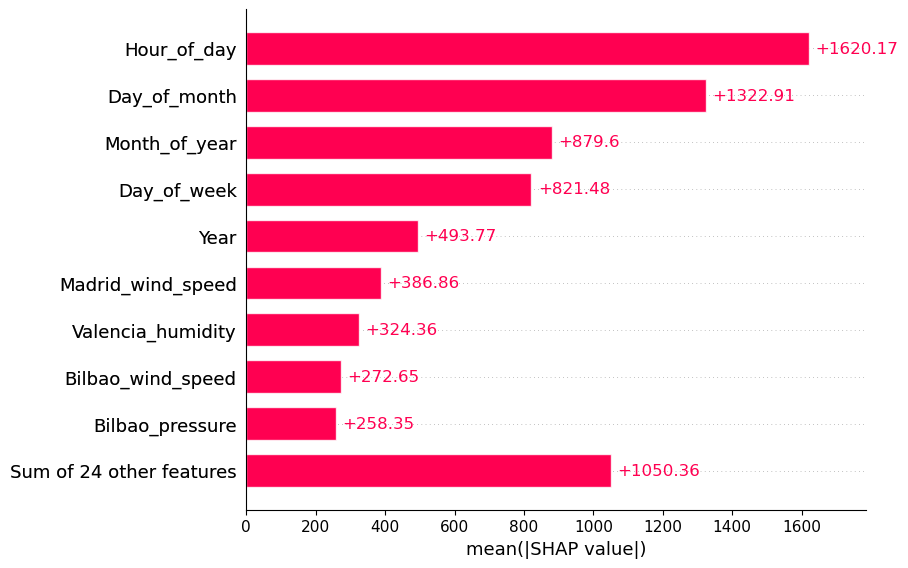

In [162]:
shap.plots.bar(shap_values)

In [170]:
shap.plots.force(shap_values[0:100])

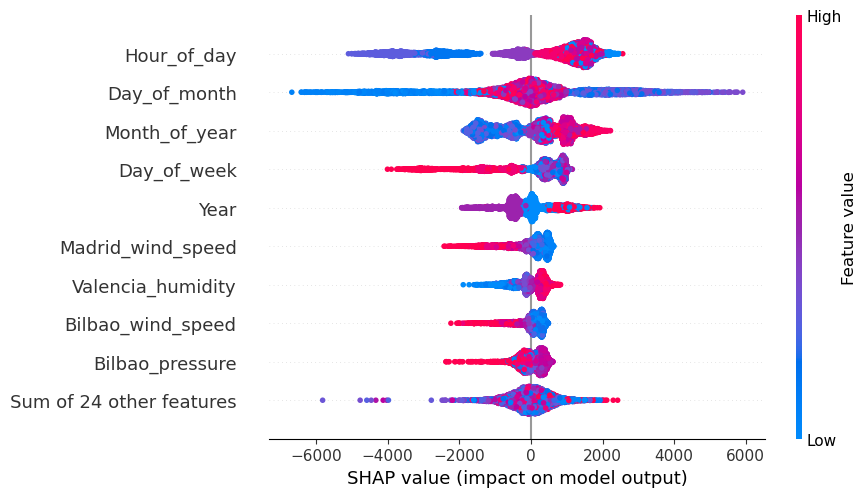

In [172]:
shap.plots.beeswarm(shap_values)

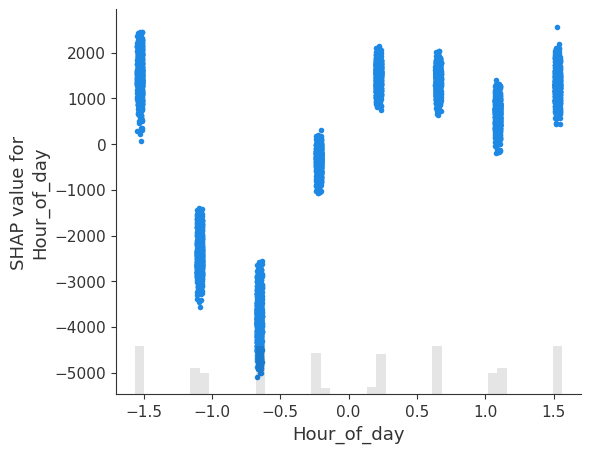

In [174]:
shap.plots.scatter(shap_values[:,"Hour_of_day"])

In [61]:
# discuss chosen methods logic